In [29]:
#Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datapane as dp
import os
import plotly.express as plot
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import datetime as dt
import statistics as sts
import warnings
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.base import MIMEBase
from email.mime.text import MIMEText
from email.utils import COMMASPACE
from email import encoders
import openpyxl
import gdown as gd
from datetime import datetime, timedelta

#Ignorando avisos
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

In [3]:
""" Definindo o caminho para a pasta faturamento na area de trabalho, se caso essa pasta não exista iremos criar ela"""

path = os.path.join(os.path.expanduser("~"), "Desktop", "Faturamento")

if not os.path.exists(path):
    os.makedirs(path)
    print("Pasta Criada!")
else:
    print("Já Existe!")

Já Existe!


In [4]:
""" Criando uma função para fazer download da base de dados ListaPedidos que está no google driver
e levar para uma pasta na area de trabalho """
def ListaPedidos():
    url = "https://drive.google.com/uc?id=1o7f-TWwGu8FRhZd2_zdU0sO7rf37PnpZ" #link do arquivo no google driver
    filename_pedidos = "ListaPedidos.xlsx" 

    #levando o arquivo para uma pasta na area de trabalho
    output_path = os.path.join(path, filename_pedidos)
    return gd.download(url,output_path,quiet=False)

In [5]:
""" Criando uma função para fazer download da base de dados Diretoria que está no google driver
e levar para uma pasta na area de trabalho"""
def Diretoria():
    url = "https://drive.google.com/uc?id=1aKanR_6Z2Q8_1bbjxWft3MmV-Uss_cne" #link do arquivo no google driver
    filename_diretoria = "Diretoria.xlsx"

    #levando o arquivo para uma pasta na area de trabalho
    output_path = os.path.join(path, filename_diretoria)
    return gd.download(url,output_path,quiet=False)

In [6]:
"""Executando as funções de Downloads das bases de dados"""

Diretoria()
ListaPedidos()

Downloading...
From: https://drive.google.com/uc?id=1aKanR_6Z2Q8_1bbjxWft3MmV-Uss_cne
To: C:\Users\55359\Desktop\Faturamento\Diretoria.xlsx
100%|█████████████████████████████████████████████████████████████████████████████| 9.42k/9.42k [00:00<00:00, 9.42MB/s]
Downloading...
From: https://drive.google.com/uc?id=1o7f-TWwGu8FRhZd2_zdU0sO7rf37PnpZ
To: C:\Users\55359\Desktop\Faturamento\ListaPedidos.xlsx
100%|█████████████████████████████████████████████████████████████████████████████| 4.39M/4.39M [00:00<00:00, 5.97MB/s]


'C:\\Users\\55359\\Desktop\\Faturamento\\ListaPedidos.xlsx'

In [7]:
""" Importando base de dados ListaPedidos e Diretoria """

df_ListaPedidos = pd.read_excel(path+"\\ListaPedidos.xlsx")
df_Diretoria = pd.read_excel(path+"\\Diretoria.xlsx")

In [8]:
""" Tratando bases """

#criando uma coluna id para
df_ListaPedidos = df_ListaPedidos.assign(id=lambda x: x['Referencia'] + x['Data Nota'].astype(str))

#executando um join entre ListaPedidos e Diretoria para coletar a diretoria de cada departamento
df_completo = pd.merge(df_ListaPedidos, df_Diretoria, left_on='Depart.', right_on='DEPARTAMENTO', how='left')
df_completo = df_completo.drop(columns=['DEPARTAMENTO'])

#Renomando colunas
df_completo.columns = ['Referencia', 'Cliente', 'Departamento', 'Vend', 'Vend', 'Valor',
       'Data', 'Nota', 'Data Nota', 'SLA', 'Empresa', 'Protheus', 'id',
       'Diretoria']

#Criando 4 novas colunas Dia, Mês, Ano e Dia-Mês
df_completo['Dia'] = df_completo['Data Nota'].dt.day
df_completo['Mes'] = df_completo['Data Nota'].dt.month
df_completo['Ano'] = df_completo['Data Nota'].dt.year
df_completo['Dia e Mês'] = df_completo['Dia'].map(str) + '-' + df_completo['Mes'].map(str)

In [9]:
""" Vizualiando a base de dados completa """
pd.set_option('display.max_columns', None) # coluna removendo reticencias
pd.set_option('display.max_rows', None) # linha Removendo reticencias

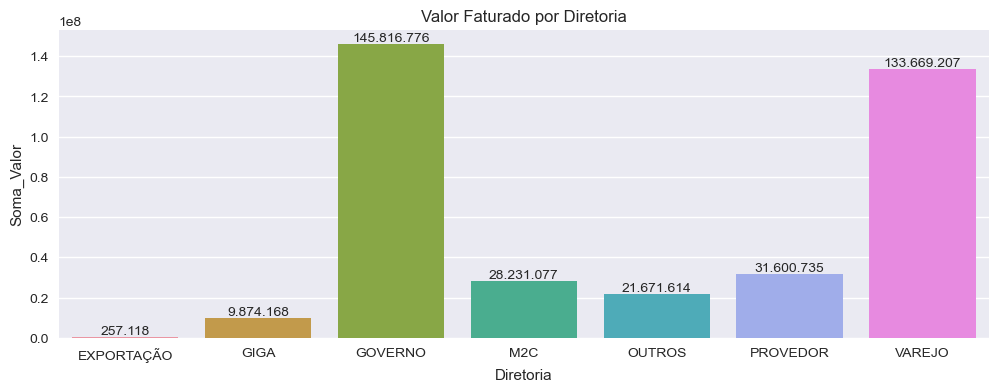

In [10]:
""" Criando uma função para criar um drafico de barras com o valor total por setor """
def graf_diretoria_valor():
    df_diretoria_agrupado = df_completo.groupby('Diretoria').agg(Soma_Valor=('Valor','sum'),
                                                                 Contagem_id=('id','count')).reset_index()
    plt.figure(figsize=(12,4))
    graf = sns.barplot(data=df_diretoria_agrupado,x="Diretoria",y='Soma_Valor')
    for i, v in enumerate(df_diretoria_agrupado['Soma_Valor']):
        plt.text(i,v, "{:,.0f}".format(v).replace(",", "."), ha='center',va='bottom')
        
    plt.xticks(range(len(df_diretoria_agrupado)),df_diretoria_agrupado['Diretoria'])
    plt.title("Valor Faturado por Diretoria")
    return plt.show()

#Retornando o grafico
graf_diretoria_valor()

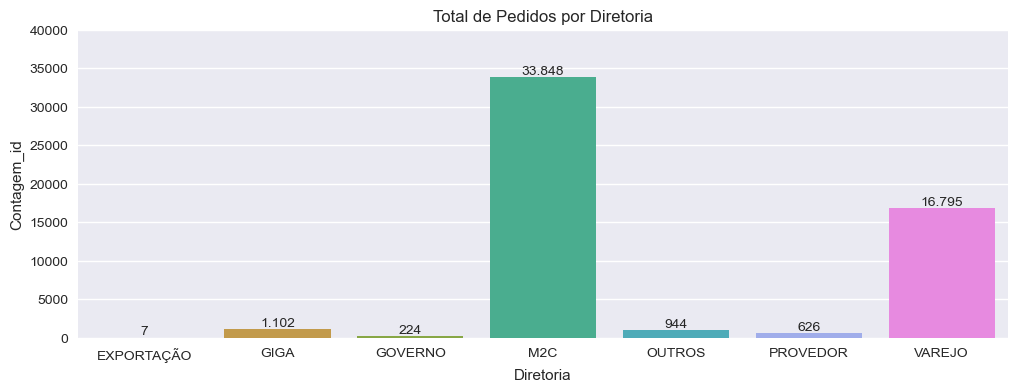

In [11]:
""" Criando uma função para criar um drafico de barras com a qtde de pedidos por Diretoria """
def graf_diretoria_pedidos():
    df_diretoria_agrupado = df_completo.groupby('Diretoria').agg(Soma_Valor=('Valor','sum'),
                                                                 Contagem_id=('id','count')).reset_index()
    plt.figure(figsize=(12,4))
    graf = sns.barplot(data=df_diretoria_agrupado,x="Diretoria",y='Contagem_id')
    for i, v in enumerate(df_diretoria_agrupado['Contagem_id']):
        plt.text(i,v,"{:,.0f}".format(v).replace(",", "."), ha='center',va='bottom')
        
    plt.xticks(range(len(df_diretoria_agrupado)),df_diretoria_agrupado['Diretoria'])
    plt.title("Total de Pedidos por Diretoria")
    plt.ylim(0,40000)
    return plt.show()

#Retornando o grafico
graf_diretoria_pedidos()

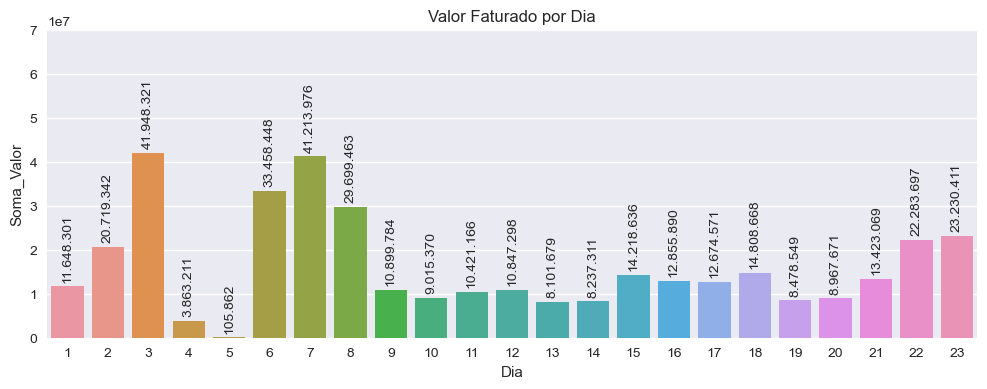

In [12]:
""" Criando uma função para criar um drafico de barras com o valor total por dia """
def graf_dia_valor():
    df_dia_agrupado = df_completo.groupby('Dia').agg(Soma_Valor=('Valor','sum'),
                                                                 Contagem_id=('id','count')).reset_index()
    plt.figure(figsize=(12,4))
    graf = sns.barplot(data=df_dia_agrupado,x="Dia",y='Soma_Valor')
    
    for i, v in enumerate(df_dia_agrupado['Soma_Valor']):
        plt.text(i,v+1000000,"{:,.0f}".format(v).replace(",", "."), ha='center',va='bottom', rotation=90)
        
    plt.xticks(range(len(df_dia_agrupado)),df_dia_agrupado['Dia'])
    plt.title("Valor Faturado por Dia")
    plt.ylim(0,70000000)
    return plt.show()

#Retornando o grafico
graf_dia_valor()

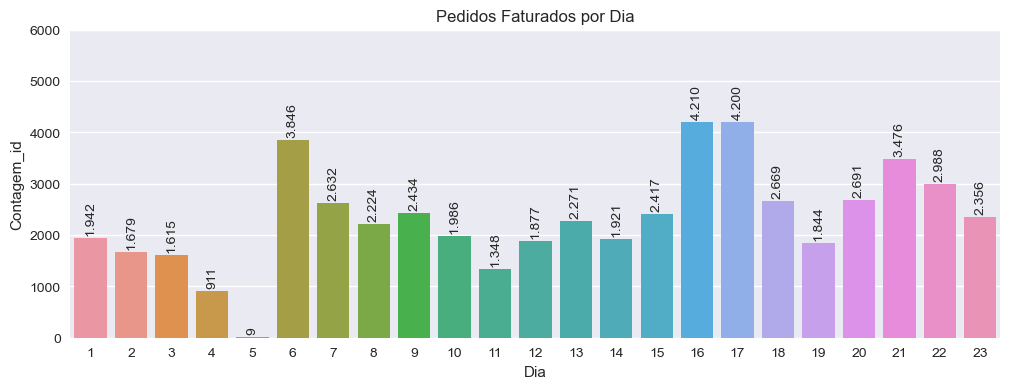

In [13]:
""" Criando uma função para criar um drafico de barras com o valor total por dia """
def graf_dia_pedidos():
    df_dia_agrupado = df_completo.groupby('Dia').agg(Soma_Valor=('Valor','sum'),
                                                                 Contagem_id=('id','count')).reset_index()
    plt.figure(figsize=(12,4))
    graf = sns.barplot(data=df_dia_agrupado,x="Dia",y='Contagem_id')
    
    for i, v in enumerate(df_dia_agrupado['Contagem_id']):
        plt.text(i,v+50,"{:,.0f}".format(v).replace(",", "."), ha='center',va='bottom', rotation=90)
        
    plt.xticks(range(len(df_dia_agrupado)),df_dia_agrupado['Dia'])
    plt.title("Pedidos Faturados por Dia")
    plt.ylim(0,6000)
    return plt.show()

#Retornando o grafico
graf_dia_pedidos()

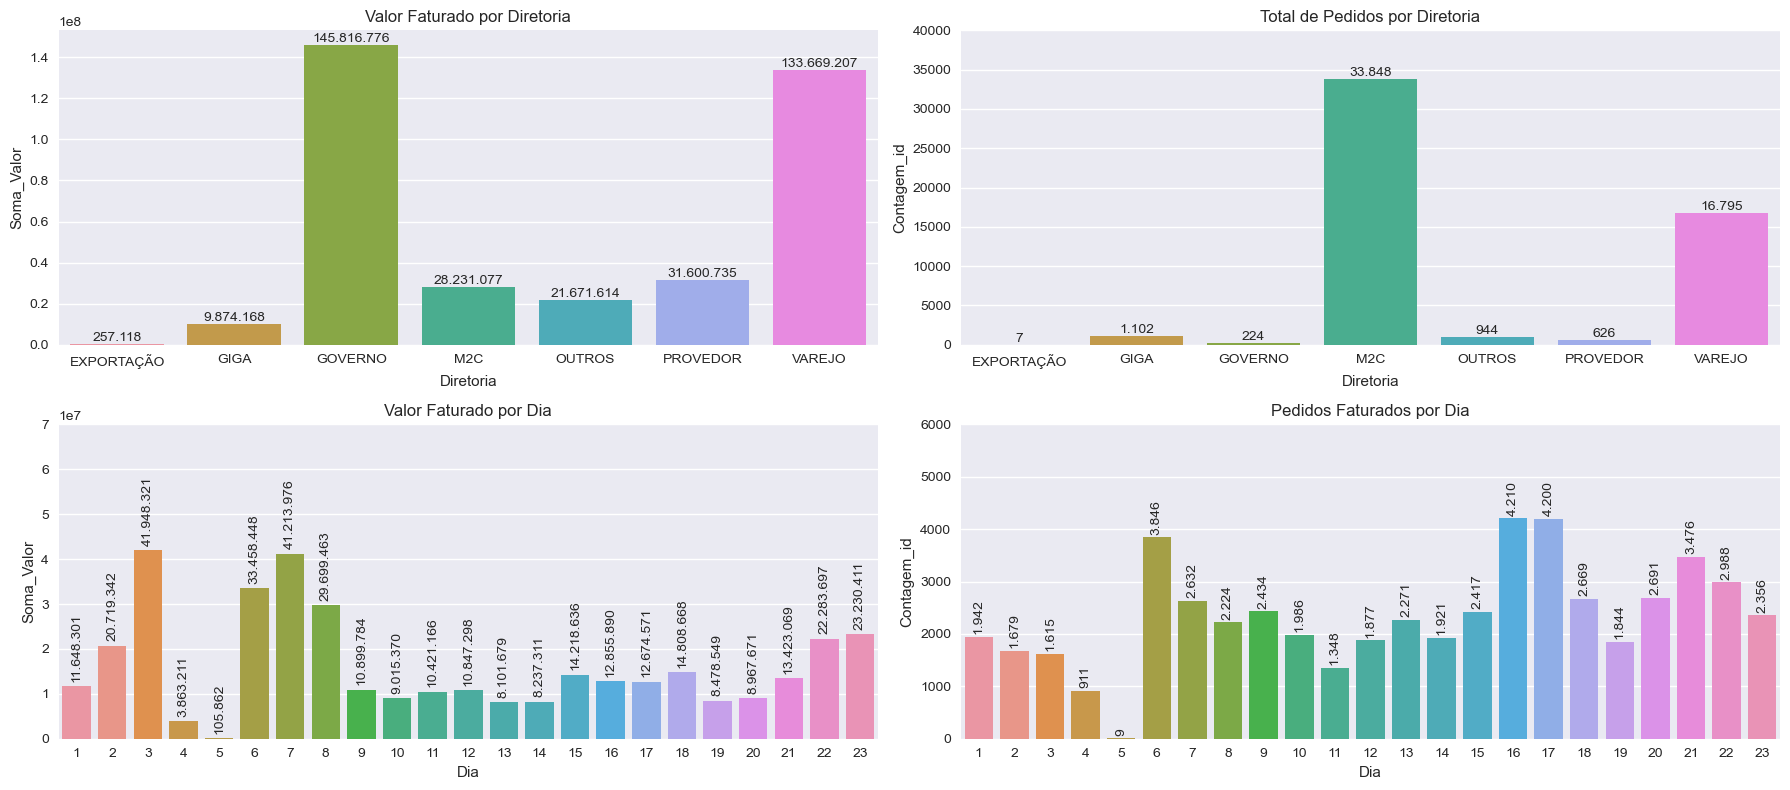

In [14]:
def subplotgeral():
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))

    # gráfico 1
    df_diretoria_agrupado = df_completo.groupby('Diretoria').agg(Soma_Valor=('Valor','sum'),
                                                                 Contagem_id=('id','count')).reset_index()
    graf = sns.barplot(data=df_diretoria_agrupado,x="Diretoria",y='Soma_Valor', ax=axs[0][0])
    for i, v in enumerate(df_diretoria_agrupado['Soma_Valor']):
        graf.text(i,v, "{:,.0f}".format(v).replace(",", "."), ha='center',va='bottom')

    graf.set_xticklabels(df_diretoria_agrupado['Diretoria'])
    graf.set_title("Valor Faturado por Diretoria")

    # gráfico 2
    df_diretoria_agrupado = df_completo.groupby('Diretoria').agg(Soma_Valor=('Valor','sum'),
                                                                 Contagem_id=('id','count')).reset_index()
    graf = sns.barplot(data=df_diretoria_agrupado,x="Diretoria",y='Contagem_id', ax=axs[0][1])
    for i, v in enumerate(df_diretoria_agrupado['Contagem_id']):
        graf.text(i,v,"{:,.0f}".format(v).replace(",", "."), ha='center',va='bottom')

    graf.set_xticklabels(df_diretoria_agrupado['Diretoria'])
    graf.set_title("Total de Pedidos por Diretoria")
    graf.set_ylim(0,40000)

    # gráfico 3
    df_dia_agrupado = df_completo.groupby('Dia').agg(Soma_Valor=('Valor','sum'),
                                                                 Contagem_id=('id','count')).reset_index()
    graf = sns.barplot(data=df_dia_agrupado,x="Dia",y='Soma_Valor', ax=axs[1][0])
    for i, v in enumerate(df_dia_agrupado['Soma_Valor']):
        graf.text(i,v+1000000,"{:,.0f}".format(v).replace(",", "."), ha='center',va='bottom', rotation=90)

    graf.set_xticklabels(df_dia_agrupado['Dia'])
    graf.set_title("Valor Faturado por Dia")
    graf.set_ylim(0,70000000)

    # gráfico 4
    df_dia_agrupado = df_completo.groupby('Dia').agg(Soma_Valor=('Valor','sum'),
                                                                 Contagem_id=('id','count')).reset_index()
    graf = sns.barplot(data=df_dia_agrupado,x="Dia",y='Contagem_id', ax=axs[1][1])
    for i, v in enumerate(df_dia_agrupado['Contagem_id']):
        graf.text(i,v+50,"{:,.0f}".format(v).replace(",", "."), ha='center',va='bottom', rotation=90)

    graf.set_xticklabels(df_dia_agrupado['Dia'])
    graf.set_title("Pedidos Faturados por Dia")
    graf.set_ylim(0,6000)
    
    plt.subplots_adjust(hspace=0.4,wspace=0.3)
    plt.savefig(path+'\\Faturamento.png', dpi=100)
    plt.tight_layout()
    return plt.show()

subplotgeral()

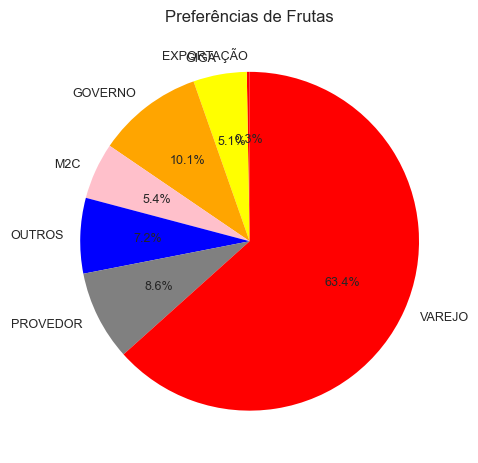

In [41]:
def graf_valor_ontem():
    
    df_completo['Data Nota'] = pd.to_datetime(df_completo['Data Nota'])
    # Filtrar somente os dados do dia de ontem
    ontem = datetime.today() - timedelta(days=2)
    df_ontem = df_completo.loc[df_completo['Data Nota'].dt.date == ontem.date()]

    df_ontem_agrupado = df_ontem.groupby('Diretoria').agg(Soma_Valor=('Valor','sum'),
                                                            Contagem_id=('id','count')).reset_index()
    # Defina as cores dos setores
    colors = ['red', 'yellow', 'orange', 'pink','blue','gray']

    # Crie um gráfico de rosca
    plt.pie(df_ontem_agrupado['Soma_Valor'], labels=df_ontem_agrupado['Diretoria'], colors=colors, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 9})

    # Adicione um título ao gráfico
    plt.title('Preferências de Frutas')

    # Exiba o gráfico
    return plt.show()

graf_valor_ontem()

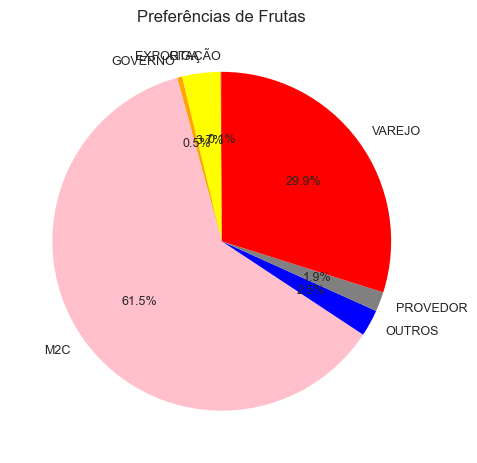

In [46]:
def graf_pedidos_hoje():
    
    df_completo['Data Nota'] = pd.to_datetime(df_completo['Data Nota'])
    # Filtrar somente os dados do dia de ontem
    ontem = datetime.today() - timedelta(days=2)
    df_ontem = df_completo.loc[df_completo['Data Nota'].dt.date == ontem.date()]

    df_ontem_agrupado = df_ontem.groupby('Diretoria').agg(Soma_Valor=('Valor','sum'),
                                                            Contagem_id=('id','count')).reset_index()
    # Defina as cores dos setores
    colors = ['red', 'yellow', 'orange', 'pink','blue','gray']

    # Crie um gráfico de rosca
    plt.pie(df_ontem_agrupado['Contagem_id'], labels=df_ontem_agrupado['Diretoria'], colors=colors, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 9})

    # Adicione um título ao gráfico
    plt.title('Preferências de Frutas')

    # Exiba o gráfico
    return plt.show()

graf_pedidos_hoje()